Supervised Learning

In [1]:
!pip install ydata-profiling # install the missing module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from ydata_profiling import ProfileReport

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 57.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=cc27012521a16d2dadbfebd4fc2a9a5f229771142d633ba9eb45db8f6c917675
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [2]:
# Load the dataset
df = pd.read_csv('/content/Microsoft_malware_dataset_min.csv')

In [3]:
# Basic data exploration
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   HasDetections               100000 non-null  int64  
 1   Wdft_IsGamer                96585 non-null   float64
 2   Census_IsVirtualDevice      99815 non-null   float64
 3   Census_OSEdition            100000 non-null  object 
 4   Census_HasOpticalDiskDrive  100000 non-null  int64  
 5   Firewall                    98924 non-null   float64
 6   SMode                       94068 non-null   float64
 7   IsProtected                 99609 non-null   float64
 8   OsPlatformSubRelease        100000 non-null  object 
 9   CountryIdentifier           100000 non-null  int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 7.6+ MB
None


In [4]:
print(df.describe())

       HasDetections  Wdft_IsGamer  Census_IsVirtualDevice  \
count  100000.000000  96585.000000            99815.000000   
mean        0.499280      0.281607                0.006642   
std         0.500002      0.449785                0.081230   
min         0.000000      0.000000                0.000000   
25%         0.000000      0.000000                0.000000   
50%         0.000000      0.000000                0.000000   
75%         1.000000      1.000000                0.000000   
max         1.000000      1.000000                1.000000   

       Census_HasOpticalDiskDrive      Firewall         SMode   IsProtected  \
count               100000.000000  98924.000000  94068.000000  99609.000000   
mean                     0.075850      0.977326      0.000351      0.944864   
std                      0.264759      0.148863      0.018727      0.228246   
min                      0.000000      0.000000      0.000000      0.000000   
25%                      0.000000      1.00000

In [5]:
print(df.head())

   HasDetections  Wdft_IsGamer  Census_IsVirtualDevice Census_OSEdition  \
0              0           0.0                     0.0     Professional   
1              0           0.0                     0.0     Professional   
2              0           0.0                     0.0             Core   
3              1           0.0                     0.0     Professional   
4              1           0.0                     0.0             Core   

   Census_HasOpticalDiskDrive  Firewall  SMode  IsProtected  \
0                           0       1.0    0.0          1.0   
1                           0       1.0    0.0          1.0   
2                           0       1.0    0.0          1.0   
3                           0       1.0    0.0          1.0   
4                           0       1.0    0.0          1.0   

  OsPlatformSubRelease  CountryIdentifier  
0                  rs4                 29  
1                  rs4                 93  
2                  rs4                

Create a Pandas Profiling Report

In [6]:
profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)
profile.to_file("dataset_profile.html")

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:363: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/ydata_profiling/model/correlations.py:66: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'Function <code object pandas_auto_compute at 0x7e551fc7b100, file "/usr/local/lib/python3.10/dist-packages/ydata_profiling/model/pandas/correlations_pandas.py", line 167>')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Handle Missing and Corrupted Values

In [21]:
# Identify missing values
print(df.isnull().sum())

HasDetections                 0
Wdft_IsGamer                  0
Census_IsVirtualDevice        0
Census_OSEdition              0
Census_HasOpticalDiskDrive    0
Firewall                      0
SMode                         0
IsProtected                   0
OsPlatformSubRelease          0
CountryIdentifier             0
dtype: int64


In [9]:
# Impute missing values
imputer = SimpleImputer(strategy='mean')  # or 'median', 'most_frequent'
df_imputed = pd.DataFrame(imputer.fit_transform(df.select_dtypes(include=[np.number])), columns=df.select_dtypes(include=[np.number]).columns)
df[df.select_dtypes(include=[np.number]).columns] = df_imputed

Remove Duplicates

In [13]:
df.duplicated().sum()

0

In [12]:
df = df.drop_duplicates()

Handle Outliers
Outlier detection can be done using various methods, such as IQR or Z-score.

In [14]:
from scipy import stats

# Assuming df contains only numeric features
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
df_no_outliers = df[(z_scores < 3).all(axis=1)]

Encode Categorical Features

In [15]:
# Example for Label Encoding
le = LabelEncoder()
df['Census_OSEdition'] = le.fit_transform(df['Census_OSEdition'])

<ipython-input-15-76384a1c944f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Census_OSEdition'] = le.fit_transform(df['Census_OSEdition'])


In [16]:
# Example for Label Encoding
le = LabelEncoder()
df['OsPlatformSubRelease'] = le.fit_transform(df['OsPlatformSubRelease'])

<ipython-input-16-3c306e1dc564>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['OsPlatformSubRelease'] = le.fit_transform(df['OsPlatformSubRelease'])


In [17]:
# Example for Label Encoding
le = LabelEncoder()
df['CountryIdentifier'] = le.fit_transform(df['CountryIdentifier'])

<ipython-input-17-8055cf14d99b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CountryIdentifier'] = le.fit_transform(df['CountryIdentifier'])


In [18]:
df.head()

,HasDetections,Wdft_IsGamer,Census_IsVirtualDevice,Census_OSEdition,Census_HasOpticalDiskDrive,Firewall,SMode,IsProtected,OsPlatformSubRelease,CountryIdentifier
0,0.0,0.0,0.0,11,0.0,1.0,0.0,1.0,4,28
1,0.0,0.0,0.0,11,0.0,1.0,0.0,1.0,4,92
2,0.0,0.0,0.0,1,0.0,1.0,0.0,1.0,4,85
3,1.0,0.0,0.0,11,0.0,1.0,0.0,1.0,4,87
4,1.0,0.0,0.0,1,0.0,1.0,0.0,1.0,4,17


Prepare Your Dataset for the Modelling Phase

In [19]:
# Assuming 'target' is the name of your target column
X = df.drop('CountryIdentifier', axis=1)
y = df['CountryIdentifier']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Apply Decision Tree and Plot Its ROC Curve

Train the Decision Tree model and plot the ROC curve.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ran

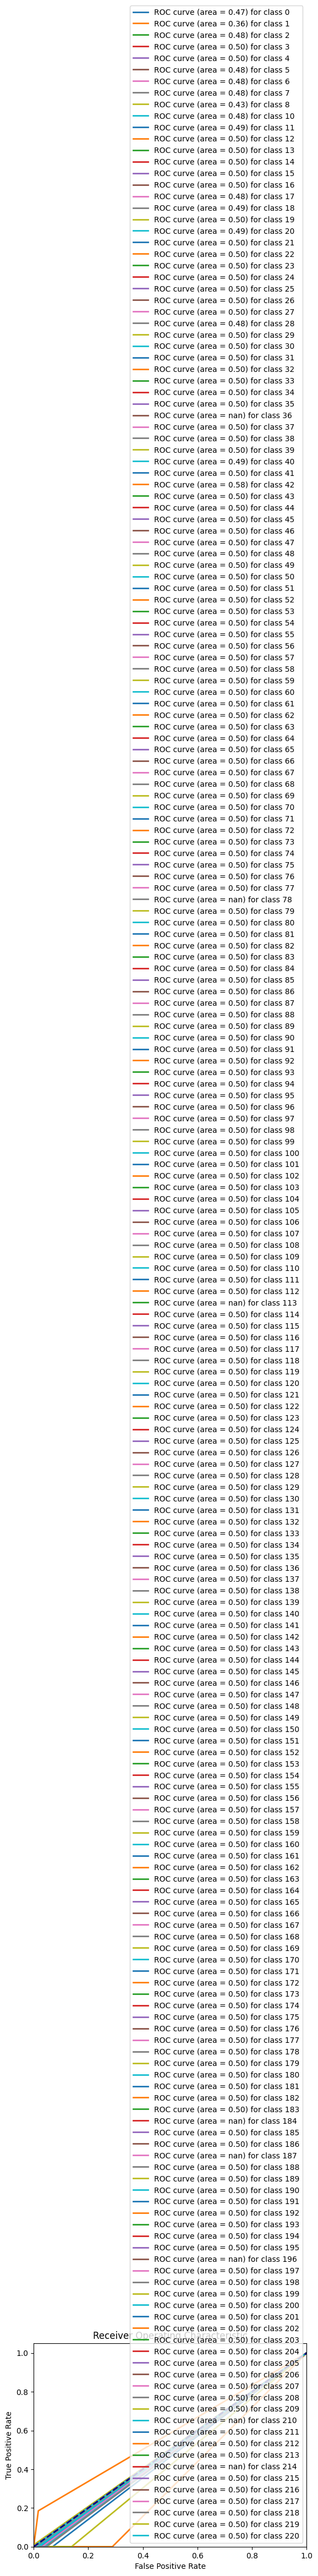

In [20]:
# Train the model
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Predict probabilities - use predict() since this is a multiclass problem
y_pred = clf.predict(X_test)

# Compute ROC curve for multiclass
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(clf.classes_)): # Get the number of classes
    fpr[i], tpr[i], _ = roc_curve(y_test == clf.classes_[i], y_pred == clf.classes_[i]) # Calculate for each class
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for multiclass
plt.figure()
for i in range(len(clf.classes_)):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (area = %0.2f) for class %s' % (roc_auc[i], clf.classes_[i]))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

Try to Improve Your Model Performance by Changing the Model Hyperparameters

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best ROC AUC score:", grid_search.best_score_)


Streaming output truncated to the last 5000 lines.
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 452, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/m

Best parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best ROC AUC score: nan


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 452, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. 

Unsupervised Learning

 Drop Out the Target Variable

In [ ]:
X_unsupervised = df.drop('CountryIdentifier', axis=1)


Apply K-Means Clustering and Plot the Clusters

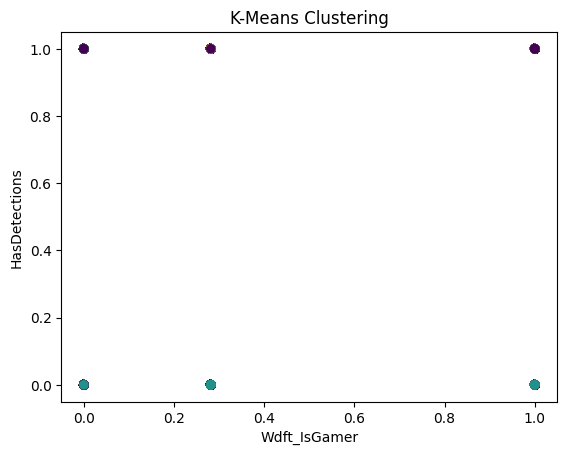

In [ ]:
# Plot clusters (example using 2D features for simplicity)

# Choose two existing features from your DataFrame
plt.scatter(df['Wdft_IsGamer'], df['HasDetections'], c=df['cluster'], cmap='viridis')

plt.xlabel('Wdft_IsGamer') # Update x-axis label
plt.ylabel('HasDetections') # Update y-axis label
plt.title('K-Means Clustering')
plt.show()

Find the Optimal K Parameter
use the Elbow Method or the Silhouette Score to determine the optimal number of clusters.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

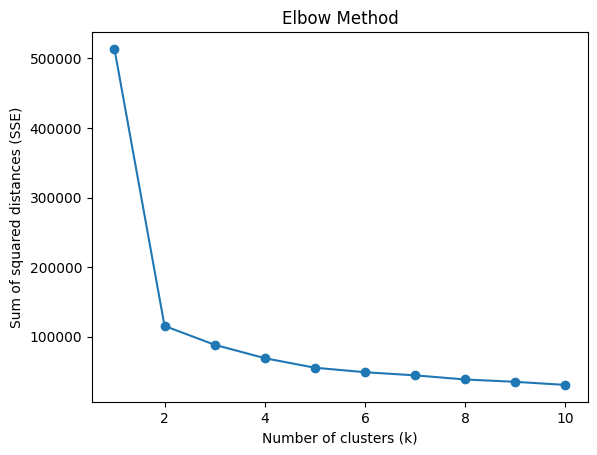

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

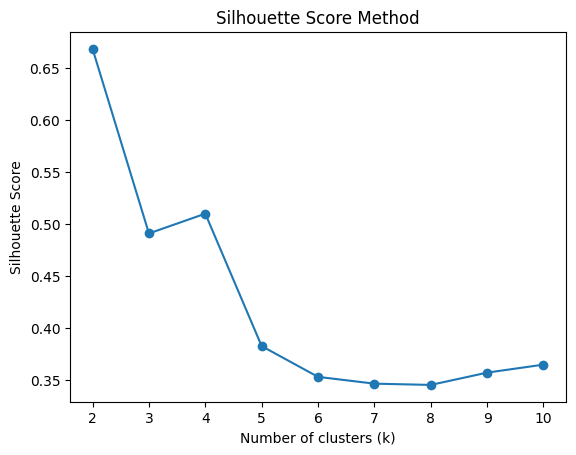

In [ ]:
from sklearn.metrics import silhouette_score

# Elbow Method
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_unsupervised)
    sse.append(kmeans.inertia_)

plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances (SSE)')
plt.title('Elbow Method')
plt.show()

# Silhouette Score
silhouette_scores = []
k_range = range(2, 11) # start from k=2
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(X_unsupervised)
    silhouette_avg = silhouette_score(X_unsupervised, clusters)
    silhouette_scores.append(silhouette_avg)

plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.show()

Interpret the Results
Elbow Method: Look for the "elbow" point in the plot where the rate of decrease sharply shifts. This indicates the optimal number of clusters.
Silhouette Score: Higher scores indicate better-defined clusters. The optimal number of clusters usually corresponds to the highest silhouette score.